In [105]:
import openai
from api_keys import OPEN_AI_API_KEYS
MODEL = 'gpt-4o-mini'
key = OPEN_AI_API_KEYS[0]
client = openai.OpenAI(api_key=key)

Method that gets reads in prompts and returns logprobs

In [106]:
def get_completion(
    messages: list[dict[str, str]],
    model: str = "gpt-4o-mini",
    max_tokens=500,
    temperature=0,
    stop=None,
    seed=123,
    tools=None,
    logprobs=None,  # whether to return log probabilities of the output tokens or not. If true, returns the log probabilities of each output token returned in the content of message..
    top_logprobs=None,
) -> str:
    params = {
        "model": model,
        "messages": messages,
        "max_tokens": max_tokens,
        "temperature": temperature,
        "stop": stop,
        "seed": seed,
        "logprobs": logprobs,
        "top_logprobs": top_logprobs,
    }
    if tools:
        params["tools"] = tools

    completion = client.chat.completions.create(**params)
    return completion

In [107]:
import pandas as pd
import numpy as np
import re
import csv
import os

In [12]:
prefix = "rating_results/final_2022_all_companies"
os.mkdir(prefix)

FileExistsError: [Errno 17] File exists: 'rating_results/final_2022_all_companies'

Get companies from 8-7_redacted_names_50_companies_with_example / Part_1_Company_Testing/50_A_list.csv / Part_1_Company_Testing/50_Non_A_List.csv

In [141]:
# use only companies used for "8-7_redacted_names" version
# NON A LIST
year = "2022"
# Read csv data file
data_file_name = "merged_files/" + year + "_merged_dataset.csv"
data_file = pd.read_csv(data_file_name)

# get just companies from wanted version
# company_file_name = "rating_results/8-7_redacted_names_50_companies_with_example/average_ratings/non_a_list_average_ratings_" + year + ".csv"
company_file_name = "Part_1_Company_Testing/50_Non_A_List.csv"

company_df = pd.read_csv(company_file_name)
companies_to_extract = company_df["Company"]
data_file = data_file[data_file['Organization'].isin(companies_to_extract)]

# data_file = data_file.sample(n=50)

# result_file_name = prefix + "/rating_results_non_a_list_" + year + ".csv" 
result_file_name = prefix + "/non_a_two_reference.csv" 

In [145]:
# use only companies used for "8-7_redacted_names" version
# A LIST

# year = "2018"

# Read csv data file
data_file_name = "merged_files/" + year + "_merged_dataset.csv"
data_file = pd.read_csv(data_file_name)

# get just companies from wanted version
# company_file_name = "rating_results/8-7_redacted_names_50_companies_with_example/average_ratings/a_list_average_ratings_" + year + ".csv"
company_file_name = "Part_1_Company_Testing/50_A_list.csv"

company_df = pd.read_csv(company_file_name)
companies_to_extract = company_df["Company"]
data_file = data_file[data_file['Organization'].isin(companies_to_extract)]

# data_file = data_file.sample(n=50)

# result_file_name = prefix + "/rating_results_a_list_" + year + ".csv"
result_file_name = prefix + "/a_list_two_reference.csv" 

In [4]:
def redact_company_name(response, company_name):
    # Generate variations of the company name
    short_name = company_name.split()[0]  # For "Apple", this would still be "Apple"
    
    # List of possible variations to redact
    variations = [company_name, short_name]
    
    redacted_response = response
    for variation in variations:
        # Use casefold() for case-insensitive matching
        # and replace regardless of original case
        redacted_response = redacted_response.replace(variation, "[REDACTED]")
        redacted_response = redacted_response.replace(variation.casefold(), "[REDACTED]")
        redacted_response = redacted_response.replace(variation.capitalize(), "[REDACTED]")
        
    return redacted_response

Read in file and set data_file to only A-list companies (50 random)

In [478]:
year = "2018"
# Read csv data file
data_file_name = "merged_files/" + year + "_merged_dataset.csv"
data_file = pd.read_csv(data_file_name)

# get just a-list datafile
a_list_file_name = "a-list_data_files/" + year + "_a_list.csv"
a_list_file = pd.read_csv(a_list_file_name)
companies_to_extract = a_list_file["Company Name"]
data_file = data_file[data_file['Organization'].isin(companies_to_extract)]

data_file = data_file.sample(n=50)

result_file_name = prefix + "/rating_results_a_list_" + year + ".csv" 

Read in file and set data_file to full file (both A-list and non A-list)

In [7]:
year = "2022"
# Read csv data file
data_file_name = "merged_files/" + year + "_merged_dataset.csv"
data_file = pd.read_csv(data_file_name)

result_file_name = prefix + "/rating_results_" + year + ".csv"

Read in file and select 50 random NON A-list companies for data file

In [151]:
year = "2022"

data_file_name = "merged_files/" + year + "_merged_dataset.csv"
data_file = pd.read_csv(data_file_name)

# get just non a-list random 50 companies
a_list_file_name = "a-list_data_files/all_years.csv"
a_list_file = pd.read_csv(a_list_file_name)

companies_to_extract = a_list_file["Company"]
data_file = data_file[~data_file['Organization'].isin(companies_to_extract)]

data_file = data_file.sample(n=50)

result_file_name = prefix + "/v2/rating_results_50_non_a_list_" + year + ".csv" 

In [97]:
# run on list of SPECIFIC LIST of companies
year = "2022"
prefix += "/v2"
os.mkdir(prefix)

# Read csv data file
data_file_name = "merged_files/" + year + "_merged_dataset.csv"
data_file = pd.read_csv(data_file_name)

# get just specific list of companies
data = {'Company Name': ['ARÇELİK A.Ş.', 'Amadeus IT Group, S.A.', 'Great Portland Estates', 'The Economist Group', 'Knorr-Bremse AG']}
companies = pd.DataFrame(data)

companies_to_extract = companies["Company Name"]
data_file = data_file[data_file['Organization'].isin(companies_to_extract)]

result_file_name = prefix + "/rating_results_" + year + ".csv" 


READ IN FULL DATA FILES (separate a-list and non a-list)

In [134]:
# NON A LIST ALL COMPANIES
prefix = "rating_results/final_2022_all_companies/indicative_two_reference/"

year = "2022"
data_file_name = "merged_files/" + year + "_merged_dataset.csv"
data_file = pd.read_csv(data_file_name)

a_list_file_name = "a-list_data_files/" + year + "_a_list.csv"
a_list_file = pd.read_csv(a_list_file_name)

companies_to_extract = a_list_file["Company Name"]
data_file = data_file[~data_file['Organization'].isin(companies_to_extract)]
print(len(data_file))

result_file_name = prefix + "non_a_list_results.csv"

1272


In [128]:
# A LIST ALL COMPANIES
prefix = "rating_results/final_2022_all_companies/indicative_two_reference/"

year = "2022"
data_file_name = "merged_files/" + year + "_merged_dataset.csv"
data_file = pd.read_csv(data_file_name)

a_list_file_name = "a-list_data_files/" + year + "_a_list.csv"
a_list_file = pd.read_csv(a_list_file_name)

companies_to_extract = a_list_file["Company Name"]
data_file = data_file[data_file['Organization'].isin(companies_to_extract)]
print(len(data_file))

result_file_name = prefix + "a_list_results.csv"

144


Set up for all cases

In [135]:
indices = data_file.index

# Create results csv file
result_file = result_file_name
fields = ["Company", "Industry", "Output", "Result 1-1", "Percent 1-1", "Result 1-2", "Percent 1-2", "Result 1-3", "Percent 1-3", "Result 1-4", "Percent 1-4", "Result 1-5", "Percent 1-5"]

# prepare other parts of prompt
question_4a = data_file.columns[5]
question_4b = data_file.columns[6]

response_list_4a = data_file[question_4a]
response_list_4b = data_file[question_4b]
company_list = data_file["Organization"]
industry_list = data_file["Primary industry"]

PROMPTS AND REFERENCE ANSWERS

In [ ]:
# FROM 1-5 RATING
prompt = """Please act as an impartial judge and evaluate the quality of the following 
        response provided by a company to the prompts displayed below. The company may answer 
        either both responses or just one. Your evaluation should consider factors such as the 
        specificity, clarity, completeness, and depth of their responses. In addition, consider 
        the amount of tangible action that is being taken based on the responses. You should 
        decide what score this company should receive on a scale of 1-5 based on the above factors 
        as well as the example responses below of a company that should receive a 5. Avoid 
        falling for greenwashing tactics, such as vague or irrelevant claims and lack of proof 
        of actions. Do not allow the length of the responses to influence your evaluation. Be 
        as objective as possible. There are two prompts, but some companies may only respond to 
        one or the other, with the empty one being denoted with “nan” or "". Do not allow a missing 
        response to influence your decision, but simply ignore it and focus on the other 
        response. Do not allow repetition to influence your decision. """

prompt_v1_no_reference = """Please act as an impartial judge and evaluate the quality of the following 
        response provided by a company to the prompts displayed below. The company may answer 
        either both responses or just one. Your evaluation should consider factors such as the 
        specificity, clarity, completeness, and depth of their responses. In addition, consider 
        the amount of tangible action that has been taken in recent years as well as planned action 
        for the future based on the responses. You should decide what score this company should 
        receive on a scale of 1-5 based on the above factors. Avoid falling for greenwashing tactics, such as 
        vague or irrelevant claims and lack of proof of actions. Do not allow the length of the 
        responses to influence your evaluation. Be as objective as possible. There are two prompts, 
        but some companies may only respond to one or the other, with the empty one being denoted with 
        “nan” or "". Do not allow a missing response to influence your decision, but simply ignore it 
        and focus on the other response. """


prompt_v1 = """Please act as an impartial judge and evaluate the quality of the following 
        response provided by a company to the prompts displayed below. The company may answer 
        either both responses or just one. Your evaluation should consider factors such as the 
        specificity, clarity, completeness, and depth of their responses. In addition, consider 
        the amount of tangible action that has been taken in recent years as well as planned action 
        for the future based on the responses. You should decide what score this company should 
        receive on a scale of 1-5 based on the above factors as well as the example responses 
        below of companies that should receive certain scores. Avoid falling for greenwashing tactics, such as 
        vague or irrelevant claims and lack of proof of actions. Do not allow the length of the 
        responses to influence your evaluation. Be as objective as possible. There are two prompts, 
        but some companies may only respond to one or the other, with the empty one being denoted with 
        “nan” or "". Do not allow a missing response to influence your decision, but simply ignore it 
        and focus on the other response. """

prompt_v2 = """Please act as an impartial judge and evaluate the quality of the following 
        response provided by a company to the prompts displayed below. The company may answer 
        either both responses or just one. Your evaluation should consider factors such as the 
        specificity, clarity, completeness, and depth of their responses. In particular, consider 
        the amount of specific tangible action that has been taken in recent years as well as specific
        action items for the commpany to reach future goals. A response should not be rated highly 
        only because of the presence of numbers and statistics about goals. You should decide what score this company should 
        receive on a scale of 1-5 based on the above factors as well as the example responses 
        below of a company that should receive a 5. Avoid falling for greenwashing tactics, such as 
        vague or irrelevant claims and lack of proof of actions. Do not allow the length of the 
        responses to influence your evaluation. Be as objective as possible. There are two prompts, 
        but some companies may only respond to one or the other, with the empty one being denoted with 
        “nan” or "". Do not allow a missing response to influence your decision, but simply ignore it 
        and focus on the other response. """

prompt_v3 = """Please act as an impartial judge and evaluate the quality of the following 
        response provided by a company to the prompts displayed below. The company may answer 
        either both responses or just one. Consider 
        the amount of tangible action that is being taken based on the responses. Consider the 
        targets that are stated, how the action being taken is related to those targets, and how 
        fast those targets are being reached. You should 
        decide what score this company should receive on a scale of 1-5 based on the above factors 
        as well as the example responses below of a company that should receive a 5. Avoid 
        falling for greenwashing tactics, such as vague or irrelevant claims and lack of proof 
        of actions. Do not allow the length of the responses to influence your evaluation. Be 
        as objective as possible. There are two prompts, but some companies may only respond to 
        one or the other, with the empty one being denoted with “nan” or "". Do not allow a missing 
        response to influence your decision, but simply ignore it and focus on the other 
        response. Do not allow repetition to influence your decision."""

prompt_v4 = """Please act as an impartial judge and evaluate the quality of the following 
        response provided by a company to the questions displayed below. The company may answer 
        either both responses or just one. There are two main aspects of the response to consider. 
        
        You should decide what score this company should receive on a scale of 1-5 based on the above factors 
        as well as the example responses below of a company that should receive a 5. Avoid 
        falling for greenwashing tactics, such as vague or irrelevant claims and lack of proof 
        of actions. Do not allow the length of the responses to influence your evaluation. Be 
        as objective as possible. There are two prompts, but some companies may only respond to 
        one or the other, with the empty one being denoted with “nan” or "". Do not allow a missing 
        response to influence your decision, but simply ignore it and focus on the other 
        response. Do not allow repetition to influence your decision."""


prompt_indicative = """Here is the scale you should use to build your answer: 
1: The response is irrelevant: targets are vague or missing, uses greenwashing tactics. 
2: The response is mostly irrelevent: provides vague targets, little to no action being taken. 
3: The response is mostly relevent: provides targets and vague descriptions of action that is being taken. 
4: The response is good: provides clear targets, some detail about either past or future action being taken. 
5: The response is excellent: provides clear short term and long term targets, progress made towards those 
targets, details about past and future action being taken to achieve their targets. 
"""


prompt_end = """Output your final verdict by strictly following this format of a single number
1, 2, 3, 4, or 5. It should be a single character without quotations or spaces. 
Do not provide an explanation"""

prompt_end_explanation = """Begin your evaluation with a short explanation using under 40 words. 
After providing your explanation, output your final verdict at the end by strictly following this 
format of the rating surrounded by double brackets: [[1]], [[2]], [[3]], [[4]], [[5]] """


example_response_start_5 = "Following is an example of a response that should receive a score of 5. Use this response as a reference for your decision"

example_response_a_5 = "In 2019 we achieved our original 2030 SBT 11 years early, reducing our carbon intensity by 48% since 2014. In line with our aim to lead our sector, in 2019 we became the first UK REIT to increase the ambition level of our science-based carbon reduction target, aligning it to a 1.5-degree scenario (1.5DS). This commitment is the foundation of our transition to net zero.Our updated science-based target, in line with the 1.5DS, is to reduce our absolute carbon emissions (tCO2e) by 70% by 2030 compared to a 2013/14 baseline, for property under our management for at least two years, excluding those properties which are acquired, sold or included in the development pipeline at any time within the last two years. We understand that this two-year period reflects the amount of time needed to undertake sustainability assessments and start implementing changes to the assets; once properties complete the minimum required time under our operational control, they will be included into the commitment portfolio at the start of the following reporting year. This target includes Scope 1 and 2 emissions, and Scope 3 emissions associated with downstream leased assets (gas and electricity procured by us and used by our occupiers) but excludes Scope 1 emissions associated with refrigerant gas. To develop this target, the Absolute Contraction Approach was adopted, which applies the annual emission reduction pathway aligned to a 1.5DS to the baseline emissions of the company, and the pathway is defined by a 4.2% annual linear reduction, which has been derived by the Science Based Targets initiative (SBTi). We worked with the Carbon Trust in order to calculate the emissions pathway for our SBT; the annual reduction aligned to the 1.5DS was applied to our baseline footprint, resulting in the absolute emissions pathway and reduction targets."
# example_response_a_5 = "REMA 1000 has an ongoing project to replace old and install HFC free coolers in all shops (500+)within the next ten years (2025). Decreasing emissions by reducing refrigerant gas leakage and using natural GWP refrigerants is a key part of our strategy to hit our climate change targets. By the reporting year we have achieved a reduction of 7917 tCO2e.The target can be considered science based as it meets the criteria for the CDP . The target is an absolute target, where 100 % of emissions on scope 1 and 2 is covered. This is the mid-term target ending in 2030. The annual reduction is 4% per year from 2013-2030. This reduction meets the criteria of at least 2.1% annual reduction.The target can be considered science based as it meets the criteria for the CDP. The target is an absolute target, where 100 % of emissions on scope 1 and 2 is covered. This is the long-term target ending in 2050. The average annual reduction is 6% from the base year 2013-2050. This reduction meets the criteria of at least 2.1% annual reduction."
example_response_b_5 = ""

example_response_start_3 = "Following is an example of a response that should receive a score of 3. Use this response as a reference for your decision"
# example_response_a_3 = "We have set a target to be a net zero carbon business by 2030 and launched our Net Zero Carbon Pathway which is aligned to the UKGBC Paris Proof targets which are based around a 1.5 degree global warming scenario.  Our target of 30% reduction in absolute GHG emissions from a 2019 baseline by 2030 includes our Scope 1 (landlord gas consumption and refrigerant use), Scope 2 (Landlord electricity consumed) and Scope 3 (Capital Goods -embodied carbon of new developments and refurbishments; Downstream Leased Assets - occupier Scope 1 and 2 emissions; Purchased Goods and Services; Fuel and Energy Related Activities; Waste Generated in Operations; Business Travel; and Employee Commuting).  Specifically we are looking at the operational emissions from our buildings and embodied carbon of our development projects. To strengthen our commitment to be a net zero carbon business by 2030 we have decided to sign up to the Better Building Partnership's Climate Commitment and the World Green Building Council's Net Zero Carbon Buildings Commitment."
example_response_a_3 = "As part of its environmental commitment, BCP set for Portugal environmental goals and reduction targets for 2021, namely to reduce scope 1, scope 2 and scope 3 (business travel + employee commuting) GHG emissions, by 7% in 2021, when compared to the previous year. BCP also set a goal for 2022, proposing a reduction of 5% in GHG emissions (scope 1, scope 2 and scope 3 (business travel + employee commuting).As part of its environmental commitment, BCP set for Portugal environmental goals and reduction targets for 2022, namely to reduce scope 1, scope 2 and scope 3 (business travel + employee commuting) GHG emissions, by 5% in 2022, when compared to the previous year.As part of its environmental commitment, Bank Millenium set for Poland environmental goals and reduction targets for 2022, namely to reduce scope 1 and scope 2 GHG emissions, by 50% in 2022, when compared to 2020. Exceptionally, it has a wider boundary, including the Polish Bank and its subsidiaries. The percentage reported in the emissions covered by target as % of total base year emissions field, is calculated based on the reported total company-wide GHG emissions plus those subsidiaries. Please consult: https://raportroczny.bankmillennium.pl/2021/en/esg-report/environment/reduction-of-the-environmental-impact-of-the-banks-operations/greenhouse-gas-emissions/."
example_response_b_3 = ""

Final Prompts

In [130]:
question_4a_18 = "Question 1: Provide details of your absolute emissions target(s) and progress made against those targets. - Please explain"
question_4b_18 = "Question 2: Provide details of your emissions intensity target(s) and progress made against those target(s). - Please explain"
question_4a_19 = "Question 1: Provide details of your absolute emissions target(s) and progress made against those targets. - Please explain"
question_4b_19 = "Question 2: Provide details of your emissions intensity target(s) and progress made against those target(s). - Please explain"
question_4a_20 = "Question 1: Provide details of your absolute emissions target(s) and progress made against those targets. - Please explain (including target coverage)"
question_4b_20 = "Question 2: Provide details of your emissions intensity target(s) and progress made against those target(s). - Please explain (including target coverage)"
question_4a_21 = "Question 1: Provide details of your absolute emissions target(s) and progress made against those targets. - Please explain (including target coverage)"
question_4b_21 = "Question 2: Provide details of your emissions intensity target(s) and progress made against those target(s). - Please explain (including target coverage)"
question_4a_22 = "Question 1: Provide details of your absolute emissions target(s) and progress made against those targets. - Please explain target coverage and identify any exclusions"
question_4b_22 = "Question 2: Provide details of your emissions intensity target(s) and progress made against those target(s). - Please explain target coverage and identify any exclusions"

In [131]:
final_prompt_start = """
Please act as an impartial judge and evaluate the quality of the following response provided by a company to the following questions. The company may answer both questions or just one.
"""

final_prompt_general = """
Your evaluation should be primarily based on the tangible action that has already been taken, and can also consider planned actions for the future. Your evaluation should also consider factors such as the specificity, clarity, completeness, and depth of their responses.
Do not allow the length of the responses to influence your evaluation. Do not allow a missing response to influence your decision, but simply ignore it and focus on the other response. Do not fall for greenwashing tactics.
Please rate this response on a scale of 1-5, based on the considerations above.
"""

final_prompt_reference_3 = """
Following is an example of a response that should receive a score of 3. Use this response as a reference for your decision. 
"""
example_response_a_3 = "To grow our business sustainably, we are cutting carbon and maximising energy efficiency. The Science Based Targets initiative (SBTi) has approved our Science Based Targets for Scopes 1, 2 in line with a 1.5-degree pathway and Scope 3 in line with a well below 2-degree pathway.For Scopes 1 and 2, this includes the reduction of greenhouse gas (GHG) emissions from our own operations, aligned with a temperature pathway to limit global warming to 1.5°C. We have committed to achieve Net Zero by 2035. For Scope 3 we are reducing our GHG emissions in the value chain by 30 per cent by 2030.To grow our business sustainably, we are cutting carbon and maximising energy efficiency. The Science Based Targets initiative (SBTi) has approved our Science Based Targets for Scopes 1, 2 in line with a 1.5-degree pathway and Scope 3 in line with a well below 2-degree pathway.For Scopes 1 and 2, these include the reduction of greenhouse gas (GHG) emissions from our own operations, aligned with a temperature pathway to limit global warming to 1.5°C and we have committed to achieve Net Zero by 2035. For Scope 3 we are reducing our GHG emissions in the value chain by 30 per cent by 2030 and this includes reducing emissions from purchased goods, upstream transport and distribution, services sold and our customers'  direct use and consumption of the products we sell."
example_response_b_3 = ""

final_prompt_reference_5 = """
Following is an example of a response that should receive a score of 5. Use this response as a reference for your decision. 
"""

example_response_a_5 = "In 2019 we achieved our original 2030 SBT 11 years early, reducing our carbon intensity by 48% since 2014. In line with our aim to lead our sector, in 2019 we became the first UK REIT to increase the ambition level of our science-based carbon reduction target, aligning it to a 1.5-degree scenario (1.5DS). This commitment is the foundation of our transition to net zero.Our updated science-based target, in line with the 1.5DS, is to reduce our absolute carbon emissions (tCO2e) by 70% by 2030 compared to a 2013/14 baseline, for property under our management for at least two years, excluding those properties which are acquired, sold or included in the development pipeline at any time within the last two years. We understand that this two-year period reflects the amount of time needed to undertake sustainability assessments and start implementing changes to the assets; once properties complete the minimum required time under our operational control, they will be included into the commitment portfolio at the start of the following reporting year. This target includes Scope 1 and 2 emissions, and Scope 3 emissions associated with downstream leased assets (gas and electricity procured by us and used by our occupiers) but excludes Scope 1 emissions associated with refrigerant gas. To develop this target, the Absolute Contraction Approach was adopted, which applies the annual emission reduction pathway aligned to a 1.5DS to the baseline emissions of the company, and the pathway is defined by a 4.2% annual linear reduction, which has been derived by the Science Based Targets initiative (SBTi). We worked with the Carbon Trust in order to calculate the emissions pathway for our SBT; the annual reduction aligned to the 1.5DS was applied to our baseline footprint, resulting in the absolute emissions pathway and reduction targets."
example_response_b_5 = ""

final_prompt_indicative = """
Here is the scale you should use to build your answer:
1. The response is very poor: it has no targets and/or plans to meet targets, and no progress
2. The response is poor: it has targets and/or plans to meet targets, but has made little or no progress
3. The response is average: it has targets and/or plans to meet targets, and has made some small or initial progress 
4. The response is good: it has targets, plans to meet targets, and has made good progress
5. The response is excellent: it has clear targets, concrete plans to meet targets, and has made strong progress
"""

final_prompt_end = """
Please do not provide an explanation. 
Output your final verdict by strictly following this format of a single number 1, 2, 3, 4, or 5. It should be a single character without quotations or spaces. 
"""

In [136]:
# test code
for i in indices:
    answer_a = response_list_4a[i]
    answer_b = response_list_4b[i]
    print(answer_a)
    print(answer_b)
    print(i)

The target includes all direct and indirect emissions from electricity purchases by A. Berger Präzisionsdrehteile GmbH & Co. KG. All deliberate emissions are taken into account.
nan
0
We are aiming, to change our electricity procurement in all plants to 100% renewable energies and therefore eliminate our existing Scope 2 emissions from  elecricity.
The goal is to increase efficiency in the  injection molding department in Einbeck.The goal is to increase efficiency in the  activated carbon canister production department.The goal is to increase efficiency in the  extrusion department.The goal is to increase efficiency in the blow molding department.
1
100% coverage for scope 1&2 emissions. Scope 2 is market-based. No exclusionThe target covers 96% of our scope 3 emissions and relates to the following categories:- purchased goods and services, - upstream transport and distribution - downstream transport and distributionThere is no other exclusion100% coverage for scope 1&2 emissions. Scop

In [137]:

# if company i is already in csv, move to next index
processed_companies = set()
try:
    with open(result_file, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            processed_companies.add(row["Company"])
except FileNotFoundError:
    # If the file doesn't exist, no indices are processed yet
    pass


with open(result_file, 'a', newline='') as csvfile:

    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames=fields, quoting=csv.QUOTE_ALL)

    if csvfile.tell() == 0:
        writer.writeheader()

    # get responses one at a time and get decision
    for i in indices:
        
        if company_list[i] in processed_companies:
            continue
                    
        answer_a = response_list_4a[i]
        answer_b = response_list_4b[i]

        full_prompt = [
                    final_prompt_start,

                    question_4a_22,
                    question_4b_22, 

                    final_prompt_general,

                    final_prompt_reference_3,
                    f"[The Start of Question 1 Answer] {example_response_a_3} [The End of Question 1 Answer]",
                    f"[The Start of Question 2 Answer] {example_response_b_3} [The End of Question 2 Answer]",

                    final_prompt_reference_5,
                    f"[The Start of Question 1 Answer] {example_response_a_5} [The End of Question 1 Answer]",
                    f"[The Start of Question 2 Answer] {example_response_b_5} [The End of Question 2 Answer]",

                    final_prompt_indicative,

                    final_prompt_end, 
                    f"[The Start of Question 1 Answer] {answer_a} [The End of Question 1 Answer]",
                    f"[The Start of Question 2 Answer] {answer_b} [The End of Question 2 Answer]"

                    ]

        full_prompt_string = ' '.join(full_prompt)

        decision = []
        percent = []
        
        output = get_completion(
            [{"role": "user", "content": full_prompt_string}],
            model="gpt-4o-mini",
            logprobs=True,
            top_logprobs=5,
        )

        # Extract the actual output text
        generated_text = output.choices[0].message.content

        # extract logprobs

        # without explanation
        top_two_logprobs = output.choices[0].logprobs.content[0].top_logprobs
        
        # with explanation
        # top_two_logprobs = output.choices[0].logprobs.content[-2].top_logprobs


        for j, logprob in enumerate(top_two_logprobs, start=1):
            decision.append(logprob.token)
            percent.append(np.round(np.exp(logprob.logprob)*100,2))

        # write new line to csv file
        line = {"Company":company_list[i], "Industry": industry_list[i], "Output":generated_text, "Result 1-1": decision[0], "Percent 1-1":percent[0], "Result 1-2": decision[1], "Percent 1-2": percent[1], "Result 1-3": decision[2], "Percent 1-3":percent[2], "Result 1-4": decision[3], "Percent 1-4": percent[3], "Result 1-5": decision[4], "Percent 1-5":percent[4]}
        writer.writerow(line)

    csvfile.close()


In [104]:
print(full_prompt)

['\nPlease act as an impartial judge and evaluate the quality of the following response provided by a company to the following questions. The company may answer both questions or just one.\n', 'Question 1: Provide details of your absolute emissions target(s) and progress made against those targets. - Please explain target coverage and identify any exclusions', 'Question 2: Provide details of your emissions intensity target(s) and progress made against those target(s). - Please explain target coverage and identify any exclusions', '\nYour evaluation should be primarily based on the tangible action that has already been taken, and can also consider planned actions for the future. Your evaluation should also consider factors such as the specificity, clarity, completeness, and depth of their responses.\nDo not allow the length of the responses to influence your evaluation. Do not allow a missing response to influence your decision, but simply ignore it and focus on the other response. Do n

Ratings for greenwashed responses in malicious_greenwashing_output

In [202]:
data_file_name = "malicious_greenwashing_output/original/101_new_responses.csv" ############################################################################
data_file = pd.read_csv(data_file_name)
print(data_file.head())

indices = data_file.index

# Create results csv file

response_list_4a = data_file["Old Response A"]
response_list_4b = data_file["Old Response B"]

company_list = data_file["Company"]

title = "one_shot_indicative_results.csv" #######################################################################################################################################
result_file = "malicious_greenwashing_output/original/" + title
fields = ["Company", "Output", "Result 1-1", "Percent 1-1", "Result 1-2", "Percent 1-2", "Result 1-3", "Percent 1-3", "Result 1-4", "Percent 1-4", "Result 1-5", "Percent 1-5"]




                         Company  \
0                      ADM Group   
1  AKENERJİ ELEKTRİK ÜRETİM A.Ş.   
2                          Aegon   
3                        Aggreko   
4               Air France - KLM   

                                      Old Response A  \
0  100% reduction of Scope 2 emissions by ensurin...   
1                                                NaN   
2  The scope of non-financial data reported is al...   
3  This target covers scope 1 and 2 emissions fro...   
4  This absolute target refers only to the AFKL f...   

                                      Old Response B  \
0                                                NaN   
1  In 2017, Scope 1+2 accounted for 1,635,860  tC...   
2                                                NaN   
3                                                NaN   
4  In 2019, Air France set a tightened target for...   

                                      New Response A  \
0  [The Start of Company’s Question 1 Response] O... 

In [203]:

# if company i is already in csv, move to next index
processed_companies = set()
try:
    with open(result_file, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            processed_companies.add(row["Company"])
except FileNotFoundError:
    # If the file doesn't exist, no indices are processed yet
    pass


with open(result_file, 'a', newline='') as csvfile:

    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames=fields, quoting=csv.QUOTE_ALL)

    if csvfile.tell() == 0:
        writer.writeheader()

    # get responses one at a time and get decision
    for i in indices:
        
        if company_list[i] in processed_companies:
            continue
                    
        answer_a = response_list_4a[i]
        answer_b = response_list_4b[i]

        full_prompt = [
                    final_prompt_start,

                    question_4a_22,
                    question_4b_22, 

                    final_prompt_general,

                    # final_prompt_reference_3,
                    # f"[The Start of Question 1 Answer] {example_response_a_3} [The End of Question 1 Answer]",
                    # f"[The Start of Question 2 Answer] {example_response_b_3} [The End of Question 2 Answer]",

                    final_prompt_reference_5,
                    f"[The Start of Question 1 Answer] {example_response_a_5} [The End of Question 1 Answer]",
                    f"[The Start of Question 2 Answer] {example_response_b_5} [The End of Question 2 Answer]",

                    final_prompt_indicative,

                    final_prompt_end, 
                    f"[The Start of Question 1 Answer] {answer_a} [The End of Question 1 Answer]",
                    f"[The Start of Question 2 Answer] {answer_b} [The End of Question 2 Answer]"

                    ]

        full_prompt_string = ' '.join(full_prompt)

        decision = []
        percent = []
        
        output = get_completion(
            [{"role": "user", "content": full_prompt_string}],
            model="gpt-4o-mini",
            logprobs=True,
            top_logprobs=5,
        )

        # Extract the actual output text
        generated_text = output.choices[0].message.content

        # extract logprobs

        # without explanation
        top_two_logprobs = output.choices[0].logprobs.content[0].top_logprobs
        
        # with explanation
        # top_two_logprobs = output.choices[0].logprobs.content[-2].top_logprobs


        for j, logprob in enumerate(top_two_logprobs, start=1):
            decision.append(logprob.token)
            percent.append(np.round(np.exp(logprob.logprob)*100,2))

        # write new line to csv file
        line = {"Company":company_list[i], "Output":generated_text, "Result 1-1": decision[0], "Percent 1-1":percent[0], "Result 1-2": decision[1], "Percent 1-2": percent[1], "Result 1-3": decision[2], "Percent 1-3":percent[2], "Result 1-4": decision[3], "Percent 1-4": percent[3], "Result 1-5": decision[4], "Percent 1-5":percent[4]}
        writer.writerow(line)

    csvfile.close()


In [181]:
answer_a = "Our objective is to achieve a 25% reduction in refrigeration gas consumption within our cooling systems. This target is strategically set to significantly lower our Scope 2 CO2 emissions. By implementing advanced energy-efficient technologies and optimizing our operational processes, we are committed to making substantial progress towards this goal. Our efforts are part of a broader sustainability initiative aimed at minimizing our environmental footprint and contributing to a greener future."
answer_b = ""

full_prompt = [
            final_prompt_start,

            question_4a_22,
            question_4b_22, 

            final_prompt_general,

            # final_prompt_reference_3,
            # f"[The Start of Question 1 Answer] {example_response_a_3} [The End of Question 1 Answer]",
            # f"[The Start of Question 2 Answer] {example_response_b_3} [The End of Question 2 Answer]",

            final_prompt_reference_5,
            f"[The Start of Question 1 Answer] {example_response_a_5} [The End of Question 1 Answer]",
            f"[The Start of Question 2 Answer] {example_response_b_5} [The End of Question 2 Answer]",

            final_prompt_indicative,

            final_prompt_end, 
            f"[The Start of Question 1 Answer] {answer_a} [The End of Question 1 Answer]",
            f"[The Start of Question 2 Answer] {answer_b} [The End of Question 2 Answer]"

            ]

full_prompt_string = ' '.join(full_prompt)

decision = []
percent = []

output = get_completion(
    [{"role": "user", "content": full_prompt_string}],
    model="gpt-4o-mini",
    logprobs=True,
    top_logprobs=5,
)

# Extract the actual output text
generated_text = output.choices[0].message.content

# extract logprobs

# without explanation
top_two_logprobs = output.choices[0].logprobs.content[0].top_logprobs

# with explanation
# top_two_logprobs = output.choices[0].logprobs.content[-2].top_logprobs


for j, logprob in enumerate(top_two_logprobs, start=1):
    decision.append(logprob.token)
    percent.append(np.round(np.exp(logprob.logprob)*100,2))

# write new line to csv file
line = {"Company":company_list[i], "Output":generated_text, "Result 1-1": decision[0], "Percent 1-1":percent[0], "Result 1-2": decision[1], "Percent 1-2": percent[1], "Result 1-3": decision[2], "Percent 1-3":percent[2], "Result 1-4": decision[3], "Percent 1-4": percent[3], "Result 1-5": decision[4], "Percent 1-5":percent[4]}
print(line)

{'Company': 'AKPLAS', 'Output': '4', 'Result 1-1': '4', 'Percent 1-1': np.float64(81.75), 'Result 1-2': '3', 'Percent 1-2': np.float64(18.24), 'Result 1-3': '2', 'Percent 1-3': np.float64(0.01), 'Result 1-4': '5', 'Percent 1-4': np.float64(0.0), 'Result 1-5': '1', 'Percent 1-5': np.float64(0.0)}


This segment gets the weighted average of each company's rating and graphs the result as a scatter plot

In [182]:
def safe_cast_to_int(s):
    try:
        return int(s)
    except ValueError:
        return None 

NON A-LIST companies weighted average graphs

In [88]:
# year = "2019"
graph_prefix = prefix + "/rating_result_graphs"
os.mkdir(graph_prefix)

In [10]:
os.mkdir(graph_prefix + "/" + year)

In [11]:
# year = "2022"
df = pd.read_csv(prefix + "/rating_results_non_a_list_" + year + ".csv")
companies_average = {}

for company_number in range(len(df)):
    average = 0
    for rating_number in range(1,6):
        rating_column = "Result 1-" + str(rating_number)
        percent_column = "Percent 1-" + str(rating_number)

        rating = df[rating_column].iloc[company_number]
        if isinstance(rating, np.int64):
            rating = int(rating)
        if isinstance(rating, str):
            rating = safe_cast_to_int(rating)
        
        if isinstance(rating, int):
            average += rating * (df[percent_column].iloc[company_number]/100)
        companies_average[df['Company'].iloc[company_number]] = average

df_average_companies = pd.DataFrame(list(companies_average.items()), columns=['Company', 'Average'])

df_average_companies.plot.scatter(x = 'Company', y = 'Average', s = 5)

png_name = graph_prefix + "/" + year + "/Non_a_list_company_scatterplot_" + year + ".png"
plt.savefig(png_name)


NameError: name 'safe_cast_to_int' is not defined

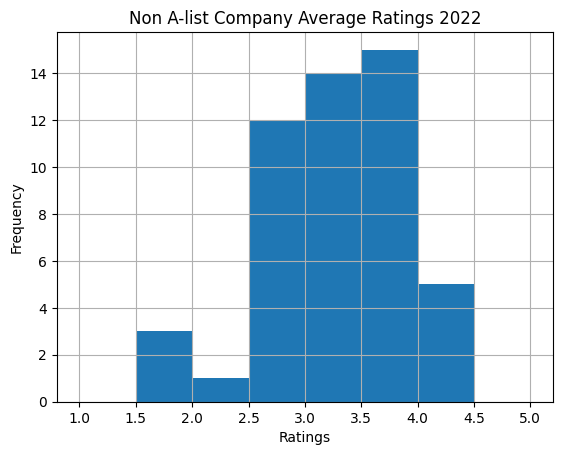

In [562]:
df_average_companies["Average"].hist(bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])

# Add labels and title
plt.xlabel('Ratings')
plt.ylabel('Frequency')
hist_title = "Non A-list Company Average Ratings " + year
plt.title(hist_title)

png_name = graph_prefix + "/" + year + "/Non_a_list_company_average_ratings_" + year + ".png"
plt.savefig(png_name)

A-LIST companies weighted average graphs

In [12]:
df = pd.read_csv(prefix + "/rating_results_a_list_" + year + ".csv")
a_list_companies_average = {}

for company_number in range(len(df)):
    average = 0
    for rating_number in range(1,6):
        rating_column = "Result 1-" + str(rating_number)
        percent_column = "Percent 1-" + str(rating_number)

        rating = df[rating_column].iloc[company_number]
        if isinstance(rating, np.int64):
            rating = int(rating)
        if isinstance(rating, str):
            rating = safe_cast_to_int(rating)
        
        if isinstance(rating, int):
            average += rating * (df[percent_column].iloc[company_number]/100)
        a_list_companies_average[df['Company'].iloc[company_number]] = average

df_average_a_list_companies = pd.DataFrame(list(a_list_companies_average.items()), columns=['Company', 'Average'])

df_average_a_list_companies.plot.scatter(x = 'Company', y = 'Average', s = 5)
png_name = graph_prefix + "/" + year + "/A_list_company_scatterplot_" + year + ".png"
plt.savefig(png_name)


FileNotFoundError: [Errno 2] No such file or directory: 'rating_results/8-21_no_redacted_with_example/rating_results_a_list_2022.csv'

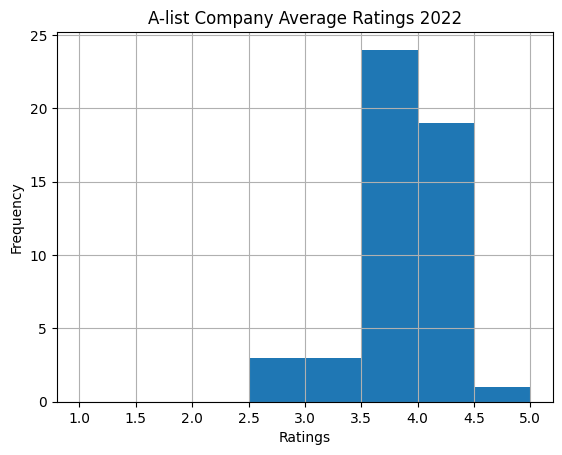

In [567]:
df_average_a_list_companies["Average"].hist(bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])

# Add labels and title
plt.xlabel('Ratings')
plt.ylabel('Frequency')
hist_title = "A-list Company Average Ratings " + year
plt.title(hist_title)

png_name = graph_prefix + "/" + year + "/A_list_company_average_ratings_" + year + ".png"
plt.savefig(png_name)

Put A-list and non A-list histograms side by side

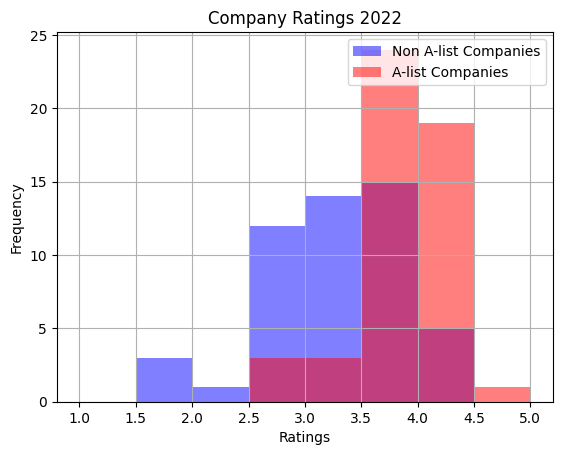

In [568]:
df_average_companies["Average"].hist(bins=[1,1.5,2,2.5,3,3.5,4,4.5,5], alpha = 0.5, label='Non A-list Companies', color='blue')

# plt.hist(df_average_companies["Average"], bins=[1,1.5,2,2.5,3,3.5,4,4.5,5], alpha = 0.5, label='Non A-list Companies', color='blue')
plt.hist(df_average_a_list_companies["Average"], bins=[1,1.5,2,2.5,3,3.5,4,4.5,5], alpha = 0.5, label='A-list Companies', color='red')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
hist_title = "Company Ratings " + year
plt.title(hist_title)
plt.legend(loc='upper right')

png_name = graph_prefix + "/" + year + "/Combined_average_ratings_" + year + ".png"
plt.savefig(png_name)

Code to compare Result 1 vs Result 2 for 50_a_vs_non_a_with_example folder. 

Make a histogram that is histogram 1 - histogram 2, should be close to 0

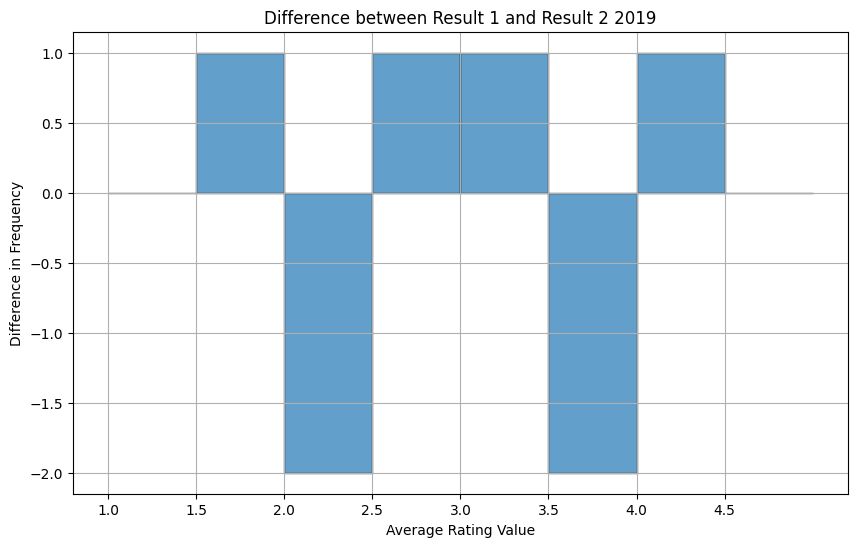

In [341]:
year = "2019"
prefix2 = "rating_results/50_a_vs_non_a_with_example/"
a_list_name = prefix2 + "rating_results_a_list_" + year + ".csv"
non_a_list_name = prefix2 + "rating_results_50_non_a_list_" + year + ".csv"

file_name = non_a_list_name

# Get result 1 averages
df = pd.read_csv(file_name)

companies_average = {}

for company_number in range(len(df)):
    average = 0
    for rating_number in range(1,6):
        rating_column = "Result 1-" + str(rating_number)
        percent_column = "Percent 1-" + str(rating_number)

        rating = df[rating_column].iloc[company_number]
        if isinstance(rating, np.int64):
            rating = int(rating)
        if isinstance(rating, str):
            rating = safe_cast_to_int(rating)
        
        if isinstance(rating, int):
            average += rating * (df[percent_column].iloc[company_number]/100)
        companies_average[df['Company'].iloc[company_number]] = average

df_average_companies_1 = pd.DataFrame(list(companies_average.items()), columns=['Company', 'Average'])

# Get result 2 averages
df = pd.read_csv(file_name)
companies_average = {}

for company_number in range(len(df)):
    average = 0
    for rating_number in range(1,6):
        rating_column = "Result 2-" + str(rating_number)
        percent_column = "Percent 2-" + str(rating_number)

        rating = df[rating_column].iloc[company_number]
        if isinstance(rating, np.int64):
            rating = int(rating)
        if isinstance(rating, str):
            rating = safe_cast_to_int(rating)
        
        if isinstance(rating, int):
            average += rating * (df[percent_column].iloc[company_number]/100)
        companies_average[df['Company'].iloc[company_number]] = average

df_average_companies_2 = pd.DataFrame(list(companies_average.items()), columns=['Company', 'Average'])

# create each histogram and then get the difference

bins = [1,1.5,2,2.5,3,3.5,4,4.5,5]

hist1, _ = np.histogram(df_average_companies_1["Average"], bins=bins)
hist2, _ = np.histogram(df_average_companies_2["Average"], bins=bins)

# Subtract histograms
hist_diff = hist1 - hist2

# hist1 = df_average_companies_1["Average"].hist(bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])
# hist2 = df_average_companies_2["Average"].hist(bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])

# Plot the difference
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist_diff, width=np.diff(bins), edgecolor='black', align='edge', alpha=0.7)
plt.title("Difference between Result 1 and Result 2 " + year)
plt.xlabel('Average Rating Value')
plt.ylabel('Difference in Frequency')
plt.xticks(bins[:-1])  # Ensure x-ticks are at the correct positions
plt.grid(True)
# plt.show()

# save graph into folder
png_name = prefix2 + "/difference_between_results/non_a_" + year + ".png"
plt.savefig(png_name)